In [ ]:
# Core BERT Model

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
!pip install nltk

In [55]:
!pip install tensorflow
!pip install tensorflow-text
!pip install transformers


In [8]:
import torch
import numpy as np
from transformers import BertTokenizer, BertModel
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [3]:
dfRev = pd.read_csv('dfRev_uniques.csv')
dfRev.drop('Unnamed: 0', axis = 1, inplace = True)
dfRev.head()

,review_text,sentiment_label,review_id,customer_id
0,best coffee from green mountain so far i recom...,positive,16434,7821
1,My vet told me to have my dog get these to hel...,positive,21485,246969
2,i have not gotten my order or heard anything f...,negative,104035,298715
3,No bitter aftertaste no stomach burning after ...,positive,115260,406505
4,I have purchase this coffee several times my h...,positive,9418,693062


In [9]:

# Load the pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Prepare the data
def get_bert_embeddings(text):
    input_ids = tokenizer.encode(text, add_special_tokens=True)
    
# Add batch dimension    
    input_ids = torch.tensor(input_ids).unsqueeze(0)  
    with torch.no_grad():
        outputs = model(input_ids)
 # Extract embeddings from the [CLS] token        
        embeddings = outputs[0][:, 0, :].squeeze().numpy() 
    return embeddings

dfRev['bert_embeddings'] = dfRev['review_text'].apply(get_bert_embeddings)

# Flatten the BERT embeddings
X = np.vstack(dfRev['bert_embeddings'])
y = dfRev['sentiment_label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Make predictions on the test set and evaluate the model
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(dfRev)

print("Accuracy:", accuracy)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


                                          review_text sentiment_label  \
0   best coffee from green mountain so far i recom...        positive   
1   My vet told me to have my dog get these to hel...        positive   
2   i have not gotten my order or heard anything f...        negative   
3   No bitter aftertaste no stomach burning after ...        positive   
4   I have purchase this coffee several times my h...        positive   
5   One 58 pound mixed breed and 2 chi babies all ...        positive   
6   I have enjoyed Pop Chips for over a year now a...        positive   
7   i put it in a glass jar for chow watmore ken i...         neutral   
8   the best dan chips i ever bought there so good...        positive   
9   I generally buy my Via from Starbucks but buyi...        positive   
10  NICE TOY BUT NOT REALLY ABLE TO USE WITH ANYTH...         neutral   
11  work with kids use to keep up plus I train to ...         neutral   
12  Great product our dog is loving a tasting trea.

In [12]:
dfRev.head()

,review_text,sentiment_label,review_id,customer_id,bert_embeddings
0,best coffee from green mountain so far i recom...,positive,16434,7821,"[-0.26857638, -0.0767716, 0.22892903, -0.18576..."
1,My vet told me to have my dog get these to hel...,positive,21485,246969,"[-0.15260261, 0.37050414, 0.051889762, -0.2822..."
2,i have not gotten my order or heard anything f...,negative,104035,298715,"[0.058731757, -0.0011941604, 0.20509318, -0.34..."
3,No bitter aftertaste no stomach burning after ...,positive,115260,406505,"[-0.17162536, -0.034127142, -0.046391126, 0.04..."
4,I have purchase this coffee several times my h...,positive,9418,693062,"[0.12620933, 0.17362598, 0.17724368, -0.237149..."


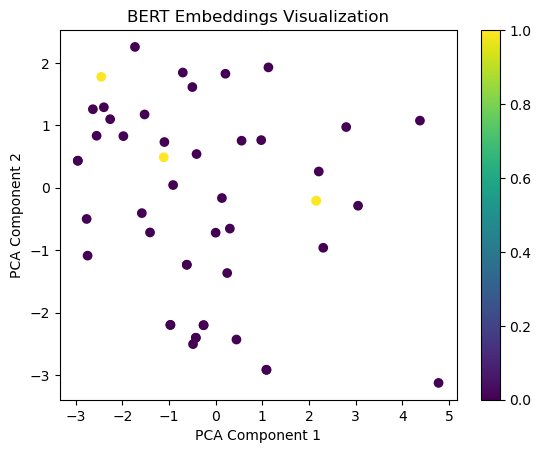

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Convert sentiment labels to numeric format
label_mapping = {'positive': 0, 'negative': 1}  # Update with your actual label mapping
y_numeric = y.map(label_mapping)

# Apply PCA to reduce the dimensionality of the BERT embeddings
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a scatter plot of the PCA-transformed embeddings
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_numeric, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('BERT Embeddings Visualization')
plt.colorbar()
plt.show()


In [11]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

     neutral       0.00      0.00      0.00         2
    positive       0.83      1.00      0.91        10

    accuracy                           0.83        12
   macro avg       0.42      0.50      0.45        12
weighted avg       0.69      0.83      0.76        12



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
